# Topic Modeling Clustering

In this notebook we visualize a previously generated topic model.

# Set Up

## Imports

In [1]:
import pandas as pd
import numpy as np
from lib import tapi

## Configuration

In [2]:
tapi.list_dbs()

['jstor_hyperparameter',
 'jstor_hyperparameter_demo',
 'tamilnet',
 'winereviews']

In [3]:
data_prefix = 'winereviews'

In [4]:
db = tapi.Edition(data_prefix)

## Import Topic Data

We import our previously generated model.

In [5]:
db.get_tables()

LABELS
VOCAB
BOW
TOPICS
DTM
THETA
PHI
TOPICS_NMF
THETA_NMF
PHI_NMF


# Inspect Results

## PyLDAViz

In [7]:
db.pyldaviz()

## Sort Topics by Doc Weight

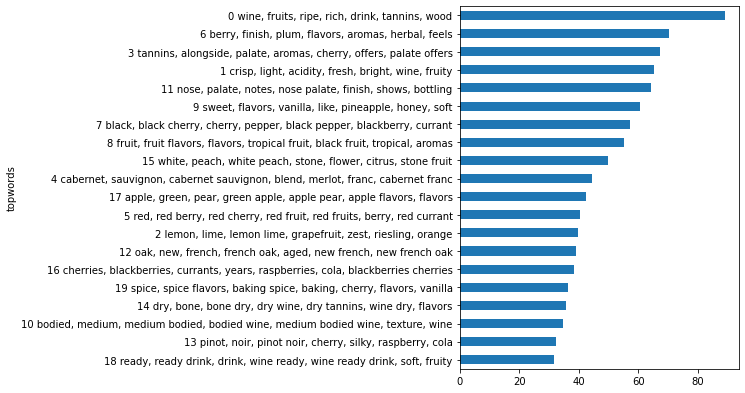

In [7]:
db.TOPICS_NMF.sort_values('doc_weight_sum', ascending=True)\
    .plot.barh(y='doc_weight_sum', x='topwords', figsize=(5, db.n_topics/3), legend=False);

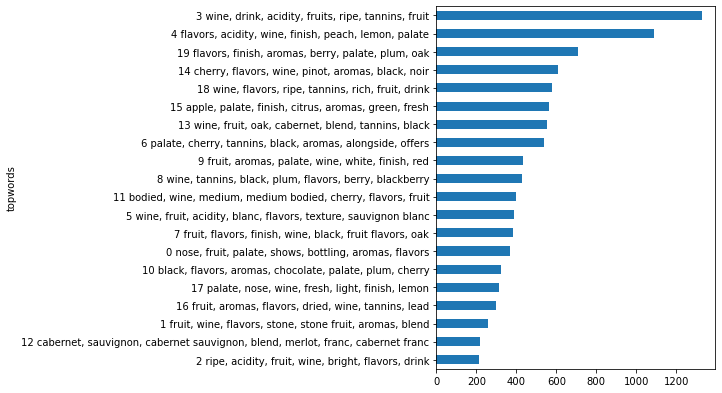

In [8]:
db.TOPICS.sort_values('doc_weight_sum', ascending=True)\
    .plot.barh(y='doc_weight_sum', x='topwords', figsize=(5, db.n_topics/3), legend=False);

## Clutser Topics

In [9]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

In [10]:
def plot_tree(tree, labels):
    plt.figure()
    fig, axes = plt.subplots(figsize=(5, db.n_topics / 3))
    dendrogram = sch.dendrogram(tree, labels=labels, orientation="left")
    plt.tick_params(axis='both', which='major', labelsize=14)

In [11]:
SIMS = pdist(normalize(db.PHI), metric='cosine')
TREE = sch.linkage(SIMS, method='ward')

<Figure size 432x288 with 0 Axes>

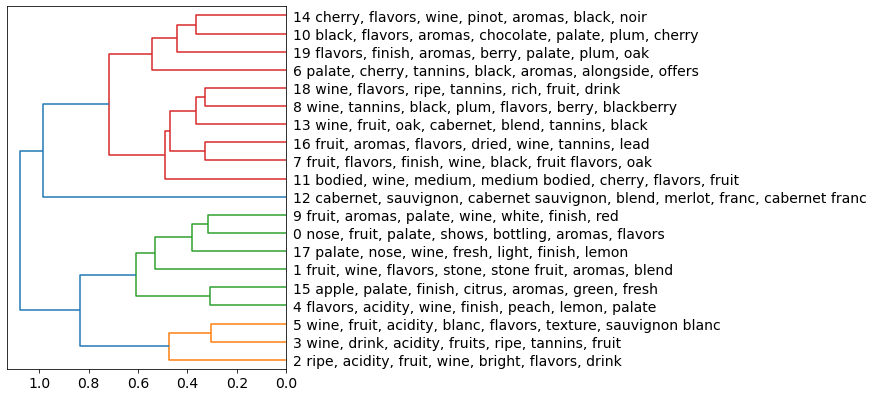

In [12]:
plot_tree(TREE, db.TOPICS.topwords.to_list());

In [13]:
SIMS = pdist(normalize(db.PHI_NMF), metric='cosine')
TREE = sch.linkage(SIMS, method='ward')

<Figure size 432x288 with 0 Axes>

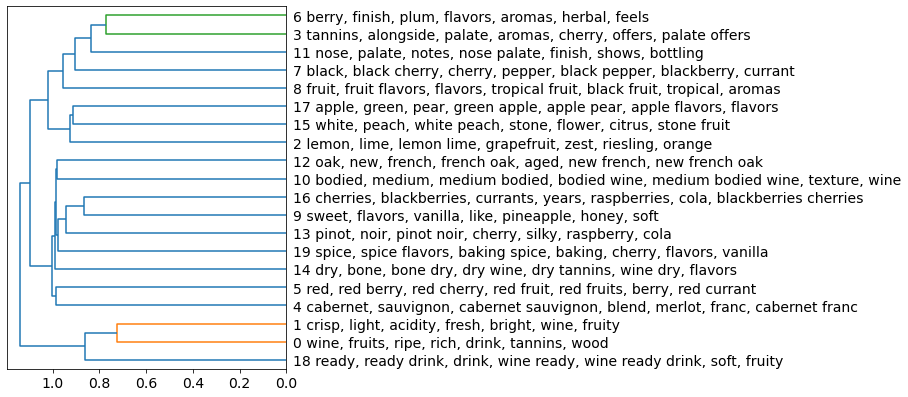

In [14]:
plot_tree(TREE, db.TOPICS_NMF.topwords.to_list());

## Group Topics by Label

In [15]:
db.LABELS.columns

Index(['doc_taster', 'doc_variety', 'doc_label', 'doc_province', 'doc_price',
       'doc_place', 'doc_title', 'doc_points'],
      dtype='object')

In [16]:
group_col = 'doc_label'

In [17]:
group_vals = db.LABELS[group_col].value_counts().to_frame('n')
group_vals.index.name = 'group_id'

In [18]:
group_vals

,n
group_id,
US,4277
France,1741
Italy,1493
Spain,513
Portugal,387
Chile,319
Argentina,297
Austria,253
Germany,165


In [19]:
# group_vals.sort_values('n').plot.barh(figsize=(5,len(group_vals) / 3), legend=False);

In [20]:
G = db.THETA.join(db.LABELS).groupby(group_col)[db.topic_cols].mean()
G.index.name = 'group_id'
G.columns = db.TOPICS.topwords

In [21]:
G2 = db.THETA_NMF.join(db.LABELS).groupby(group_col)[db.topic_cols].mean()
G2.index.name = 'group_id'
G2.columns = db.TOPICS_NMF.topwords

### Heatmap of Labels and Topics

In [22]:
G.style.background_gradient()

topwords,"0 nose, fruit, palate, shows, bottling, aromas, flavors","1 fruit, wine, flavors, stone, stone fruit, aromas, blend","2 ripe, acidity, fruit, wine, bright, flavors, drink","3 wine, drink, acidity, fruits, ripe, tannins, fruit","4 flavors, acidity, wine, finish, peach, lemon, palate","5 wine, fruit, acidity, blanc, flavors, texture, sauvignon blanc","6 palate, cherry, tannins, black, aromas, alongside, offers","7 fruit, flavors, finish, wine, black, fruit flavors, oak","8 wine, tannins, black, plum, flavors, berry, blackberry","9 fruit, aromas, palate, wine, white, finish, red","10 black, flavors, aromas, chocolate, palate, plum, cherry","11 bodied, wine, medium, medium bodied, cherry, flavors, fruit","12 cabernet, sauvignon, cabernet sauvignon, blend, merlot, franc, cabernet franc","13 wine, fruit, oak, cabernet, blend, tannins, black","14 cherry, flavors, wine, pinot, aromas, black, noir","15 apple, palate, finish, citrus, aromas, green, fresh","16 fruit, aromas, flavors, dried, wine, tannins, lead","17 palate, nose, wine, fresh, light, finish, lemon","18 wine, flavors, ripe, tannins, rich, fruit, drink","19 flavors, finish, aromas, berry, palate, plum, oak"
group_id,,,,,,,,,,,,,,,,,,,,
Argentina,0.017223,0.005358,0.015106,0.011075,0.076892,0.004433,0.008821,0.021213,0.060615,0.039516,0.073478,0.021489,0.014740,0.020641,0.028028,0.064304,0.022479,0.008207,0.022821,0.463561
Armenia,0.001923,0.001923,0.001923,0.001923,0.001923,0.001923,0.001923,0.001923,0.001923,0.001923,0.001923,0.001923,0.001923,0.001923,0.001923,0.293841,0.001923,0.671544,0.001923,0.001923
Australia,0.039875,0.045141,0.031342,0.018888,0.172149,0.043563,0.010734,0.045255,0.040833,0.038960,0.031525,0.076840,0.022294,0.106585,0.059485,0.085518,0.017130,0.022919,0.029261,0.061702
Austria,0.009236,0.013169,0.014136,0.166184,0.125760,0.132790,0.011392,0.011176,0.009675,0.061472,0.009013,0.012728,0.006928,0.012032,0.014547,0.091056,0.004981,0.252316,0.029924,0.011485
Brazil,0.002083,0.002083,0.002083,0.002083,0.070195,0.002083,0.002083,0.002083,0.002083,0.186350,0.002083,0.002083,0.029317,0.002083,0.002083,0.085927,0.002083,0.002083,0.002083,0.596961
Bulgaria,0.055094,0.001665,0.001665,0.001665,0.095599,0.006752,0.123396,0.043592,0.059710,0.031105,0.037404,0.082133,0.030672,0.050516,0.137111,0.127101,0.016939,0.048609,0.034265,0.015006
Canada,0.029963,0.044400,0.008163,0.010371,0.315424,0.001922,0.025998,0.014146,0.043203,0.001922,0.057705,0.097372,0.046683,0.144639,0.030857,0.020128,0.027565,0.030291,0.008520,0.040727
Chile,0.010667,0.005195,0.005634,0.008929,0.062058,0.015110,0.008323,0.033408,0.057847,0.020170,0.064096,0.022569,0.019867,0.023726,0.035106,0.086460,0.026077,0.015847,0.019482,0.459427
Croatia,0.032614,0.001846,0.001846,0.001846,0.241001,0.030647,0.001846,0.027314,0.069251,0.159752,0.001846,0.076417,0.001846,0.001846,0.001846,0.085884,0.060238,0.075416,0.037516,0.089184


In [23]:
G2.style.background_gradient()

topwords,"0 wine, fruits, ripe, rich, drink, tannins, wood","1 crisp, light, acidity, fresh, bright, wine, fruity","2 lemon, lime, lemon lime, grapefruit, zest, riesling, orange","3 tannins, alongside, palate, aromas, cherry, offers, palate offers","4 cabernet, sauvignon, cabernet sauvignon, blend, merlot, franc, cabernet franc","5 red, red berry, red cherry, red fruit, red fruits, berry, red currant","6 berry, finish, plum, flavors, aromas, herbal, feels","7 black, black cherry, cherry, pepper, black pepper, blackberry, currant","8 fruit, fruit flavors, flavors, tropical fruit, black fruit, tropical, aromas","9 sweet, flavors, vanilla, like, pineapple, honey, soft","10 bodied, medium, medium bodied, bodied wine, medium bodied wine, texture, wine","11 nose, palate, notes, nose palate, finish, shows, bottling","12 oak, new, french, french oak, aged, new french, new french oak","13 pinot, noir, pinot noir, cherry, silky, raspberry, cola","14 dry, bone, bone dry, dry wine, dry tannins, wine dry, flavors","15 white, peach, white peach, stone, flower, citrus, stone fruit","16 cherries, blackberries, currants, years, raspberries, cola, blackberries cherries","17 apple, green, pear, green apple, apple pear, apple flavors, flavors","18 ready, ready drink, drink, wine ready, wine ready drink, soft, fruity","19 spice, spice flavors, baking spice, baking, cherry, flavors, vanilla"
group_id,,,,,,,,,,,,,,,,,,,,
Argentina,0.003778,0.002809,0.002406,0.002591,0.003381,0.004291,0.032378,0.006159,0.005005,0.005226,0.001321,0.007952,0.005107,0.000660,0.001233,0.002796,0.000771,0.004652,0.001262,0.002365
Armenia,0.000000,0.000000,0.007654,0.016648,0.000000,0.000000,0.000000,0.000000,0.000000,0.011213,0.019981,0.025184,0.000000,0.000000,0.000000,0.034186,0.000000,0.012037,0.001048,0.000000
Australia,0.004829,0.003903,0.003366,0.002979,0.004865,0.001962,0.007155,0.001891,0.007151,0.008101,0.013773,0.010135,0.003175,0.003076,0.001574,0.004540,0.003035,0.004603,0.003162,0.001728
Austria,0.009814,0.010697,0.010066,0.001367,0.000641,0.004279,0.001318,0.002126,0.004556,0.002956,0.001404,0.017819,0.000742,0.000617,0.003417,0.005802,0.001649,0.008820,0.003684,0.002192
Brazil,0.000000,0.000000,0.000000,0.000405,0.000000,0.000000,0.037522,0.000875,0.009076,0.001200,0.000000,0.008930,0.000000,0.000000,0.000000,0.019706,0.000000,0.012393,0.000000,0.000000
Bulgaria,0.004890,0.003380,0.013420,0.010266,0.008132,0.004278,0.008100,0.025131,0.000951,0.002126,0.004630,0.006389,0.000000,0.000754,0.000000,0.004539,0.000157,0.004487,0.000608,0.005551
Canada,0.004511,0.001957,0.003419,0.003245,0.007544,0.002304,0.005168,0.004285,0.012412,0.010936,0.004686,0.010945,0.006265,0.010151,0.001178,0.004776,0.000230,0.006194,0.000094,0.002245
Chile,0.002774,0.003201,0.002877,0.001796,0.003521,0.003911,0.033364,0.005637,0.005594,0.005152,0.002471,0.008507,0.004899,0.001609,0.001725,0.003305,0.000958,0.006472,0.000768,0.003438
Croatia,0.002377,0.002846,0.020127,0.005764,0.000000,0.009851,0.013154,0.003407,0.003007,0.005849,0.000000,0.016615,0.009238,0.000000,0.000000,0.007379,0.000043,0.000350,0.000000,0.000000


### Top Topic per Label Group

In [24]:
group_vals['top_topic'] = G.T[group_vals.index].idxmax()
group_vals['top_topic2'] = G2.T[group_vals.index].idxmax()

In [25]:
group_vals.sort_values('top_topic')

,n,top_topic,top_topic2
group_id,,,
Bulgaria,10,"14 cherry, flavors, wine, pinot, aromas, black...","7 black, black cherry, cherry, pepper, black p..."
Mexico,3,"14 cherry, flavors, wine, pinot, aromas, black...","9 sweet, flavors, vanilla, like, pineapple, ho..."
Israel,32,"14 cherry, flavors, wine, pinot, aromas, black...","7 black, black cherry, cherry, pepper, black p..."
Georgia,6,"14 cherry, flavors, wine, pinot, aromas, black...","15 white, peach, white peach, stone, flower, c..."
Serbia,1,"14 cherry, flavors, wine, pinot, aromas, black...","5 red, red berry, red cherry, red fruit, red f..."
Morocco,4,"14 cherry, flavors, wine, pinot, aromas, black...","7 black, black cherry, cherry, pepper, black p..."
Ukraine,1,"14 cherry, flavors, wine, pinot, aromas, black...","9 sweet, flavors, vanilla, like, pineapple, ho..."
New Zealand,108,"15 apple, palate, finish, citrus, aromas, gree...","10 bodied, medium, medium bodied, bodied wine,..."
Austria,253,"17 palate, nose, wine, fresh, light, finish, l...","11 nose, palate, notes, nose palate, finish, s..."


### Top Label Group per Topic

In [26]:
G.idxmax().to_frame('label').sort_values('label')

,label
topwords,
"17 palate, nose, wine, fresh, light, finish, lemon",Armenia
"15 apple, palate, finish, citrus, aromas, green, fresh",Armenia
"19 flavors, finish, aromas, berry, palate, plum, oak",Brazil
"13 wine, fruit, oak, cabernet, blend, tannins, black",Canada
"9 fruit, aromas, palate, wine, white, finish, red",Egypt
"5 wine, fruit, acidity, blanc, flavors, texture, sauvignon blanc",England
"0 nose, fruit, palate, shows, bottling, aromas, flavors",Hungary
"2 ripe, acidity, fruit, wine, bright, flavors, drink",Israel
"6 palate, cherry, tannins, black, aromas, alongside, offers",Italy


In [27]:
G2.idxmax().to_frame('label').sort_values('label')

,label
topwords,
"15 white, peach, white peach, stone, flower, citrus, stone fruit",Armenia
"6 berry, finish, plum, flavors, aromas, herbal, feels",Brazil
"12 oak, new, french, french oak, aged, new french, new french oak",Croatia
"17 apple, green, pear, green apple, apple pear, apple flavors, flavors",Egypt
"8 fruit, fruit flavors, flavors, tropical fruit, black fruit, tropical, aromas",Egypt
"19 spice, spice flavors, baking spice, baking, cherry, flavors, vanilla",Greece
"1 crisp, light, acidity, fresh, bright, wine, fruity",India
"11 nose, palate, notes, nose palate, finish, shows, bottling",India
"3 tannins, alongside, palate, aromas, cherry, offers, palate offers",Italy


## How Similar are the Topics to Each Other?

In [28]:
X = db.THETA.T.dot(db.THETA_NMF)
X.columns = db.TOPICS_NMF.topwords
X.index = db.TOPICS.topwords
X.columns.name = 'NMF'
X.index.name = 'LDA'

In [29]:
# X.style.background_gradient()

In [30]:
# X.T.style.background_gradient()

In [31]:
X2 = X.stack().to_frame('w').sort_values('w', ascending=False)

In [32]:
X2.head(10).style.bar()

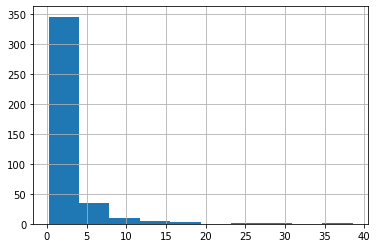

In [33]:
X2.w.hist();

In [34]:
# X2.w.sort_values(ascending=False).head(40).sort_values().plot.barh(figsize=(10,20))